In [1]:
import numpy as np
import pandas as pd

from methods.CombinationLinearSystemSolver import CombinationLinearSystemSolver
from methods.LeastSquare import LeastSquare
from methods.SingularDecomposition import SingularDecomposition
from methods.GeneralizedLeastSquare import GeneralizedLeastSquare

from utils.Experiment import Experiment
from utils.sup_functions import boundary_visiting


%matplotlib inline

In [2]:
grid_params = {'M':[i for i in range(8, 16, 2)], 
               'EPSILONS':[0.01, 0.035, 0.05], 
               'CONDS':[1,10,100, 1000, 5000],
               'DISTRIBUTIONS':{'uniform': lambda m: np.random.uniform(size=m), 'normal': lambda m: np.random.normal(size=m), 'boundary visiting': boundary_visiting}}

In [3]:
exp = Experiment(grid_params=grid_params, 
                 n_dim=5, 
                 x_vector=np.array([0.3, 0.5, 0.7, 0.82, 0.9]), 
                 models=[GeneralizedLeastSquare(genetic_alg_steps=30), CombinationLinearSystemSolver(combinations_to_take=40), LeastSquare(), SingularDecomposition()])

In [4]:
experiment_result = exp.run_experiment(monte_karlo_steps=30, verbose=False)

100%|██████████| 180/180 [1:12:59<00:00, 24.33s/it]


In [5]:
experiment_result.head(20)

,M,EPSILONS,CONDS,DISTRIBUTIONS,REAL_COND,GLSTM_error,GLSTM_min_error_div_by_eps,GLSTM_max_error_div_by_eps,CombinationLinearSystemSolver_error,CombinationLinearSystemSolver_min_error_div_by_eps,CombinationLinearSystemSolver_max_error_div_by_eps,LSTM_error,LSTM_min_error_div_by_eps,LSTM_max_error_div_by_eps,SVD_error,SVD_min_error_div_by_eps,SVD_max_error_div_by_eps
0,8,0.010,1,uniform,4.619569,0.002120,0.020408,0.168188,0.001259,0.014764,0.089544,0.001946,0.020585,0.139400,0.001946,0.020585,0.139400
1,8,0.010,10,uniform,23.654512,0.001742,0.019844,0.144375,0.001094,0.010179,0.079522,0.001675,0.017468,0.122689,0.001675,0.017468,0.122689
2,8,0.010,100,uniform,216.804769,0.001838,0.024087,0.124101,0.000921,0.009222,0.065354,0.001684,0.019048,0.120661,0.001684,0.019048,0.120661
3,8,0.010,1000,uniform,2058.820454,0.001857,0.023258,0.147064,0.001094,0.010511,0.075558,0.001713,0.020094,0.116175,0.001713,0.020094,0.116175
4,8,0.010,5000,uniform,11235.282268,0.002299,0.023696,0.144210,0.001083,0.012088,0.074509,0.001783,0.020178,0.122849,0.001783,0.020178,0.122849
5,8,0.010,1,normal,5.298920,0.002628,0.040509,0.206788,0.007561,0.063680,0.546433,0.002406,0.033059,0.167710,0.002406,0.033059,0.167710
6,8,0.010,10,normal,22.726761,0.002076,0.024583,0.155771,0.013294,0.128300,0.930730,0.001903,0.023858,0.136207,0.001903,0.023858,0.136207
7,8,0.010,100,normal,214.623806,0.002019,0.019585,0.162549,0.026820,0.253675,1.893836,0.001799,0.018036,0.134356,0.001799,0.018036,0.134356
8,8,0.010,1000,normal,2356.967514,0.001981,0.022181,0.154068,0.024491,0.266246,1.753796,0.001682,0.016734,0.122161,0.001682,0.016734,0.122161
9,8,0.010,5000,normal,10331.268658,0.001891,0.019914,0.146489,0.040435,0.591568,2.886236,0.001471,0.010848,0.111842,0.001471,0.010848,0.111842


In [8]:
experiment_result.columns

Index(['M', 'EPSILONS', 'CONDS', 'DISTRIBUTIONS', 'REAL_COND', 'GLSTM_error',
       'GLSTM_min_error_div_by_eps', 'GLSTM_max_error_div_by_eps',
       'CombinationLinearSystemSolver_error',
       'CombinationLinearSystemSolver_min_error_div_by_eps',
       'CombinationLinearSystemSolver_max_error_div_by_eps', 'LSTM_error',
       'LSTM_min_error_div_by_eps', 'LSTM_max_error_div_by_eps', 'SVD_error',
       'SVD_min_error_div_by_eps', 'SVD_max_error_div_by_eps'],
      dtype='object')

In [9]:
experiment_result[['M', 'EPSILONS', 'CONDS', 'DISTRIBUTIONS', 'REAL_COND', 'GLSTM_error',
       'CombinationLinearSystemSolver_error', 'LSTM_error', 'SVD_error']].head(20)

,M,EPSILONS,CONDS,DISTRIBUTIONS,REAL_COND,GLSTM_error,CombinationLinearSystemSolver_error,LSTM_error,SVD_error
0,8,0.010,1,uniform,4.619569,0.002120,0.001259,0.001946,0.001946
1,8,0.010,10,uniform,23.654512,0.001742,0.001094,0.001675,0.001675
2,8,0.010,100,uniform,216.804769,0.001838,0.000921,0.001684,0.001684
3,8,0.010,1000,uniform,2058.820454,0.001857,0.001094,0.001713,0.001713
4,8,0.010,5000,uniform,11235.282268,0.002299,0.001083,0.001783,0.001783
5,8,0.010,1,normal,5.298920,0.002628,0.007561,0.002406,0.002406
6,8,0.010,10,normal,22.726761,0.002076,0.013294,0.001903,0.001903
7,8,0.010,100,normal,214.623806,0.002019,0.026820,0.001799,0.001799
8,8,0.010,1000,normal,2356.967514,0.001981,0.024491,0.001682,0.001682
9,8,0.010,5000,normal,10331.268658,0.001891,0.040435,0.001471,0.001471


In [10]:
experiment_result[['M', 'EPSILONS', 'CONDS', 'DISTRIBUTIONS', 'REAL_COND', 'GLSTM_min_error_div_by_eps',
       'CombinationLinearSystemSolver_min_error_div_by_eps', 'LSTM_min_error_div_by_eps', 'SVD_min_error_div_by_eps']].head(20)

,M,EPSILONS,CONDS,DISTRIBUTIONS,REAL_COND,GLSTM_min_error_div_by_eps,CombinationLinearSystemSolver_min_error_div_by_eps,LSTM_min_error_div_by_eps,SVD_min_error_div_by_eps
0,8,0.010,1,uniform,4.619569,0.020408,0.014764,0.020585,0.020585
1,8,0.010,10,uniform,23.654512,0.019844,0.010179,0.017468,0.017468
2,8,0.010,100,uniform,216.804769,0.024087,0.009222,0.019048,0.019048
3,8,0.010,1000,uniform,2058.820454,0.023258,0.010511,0.020094,0.020094
4,8,0.010,5000,uniform,11235.282268,0.023696,0.012088,0.020178,0.020178
5,8,0.010,1,normal,5.298920,0.040509,0.063680,0.033059,0.033059
6,8,0.010,10,normal,22.726761,0.024583,0.128300,0.023858,0.023858
7,8,0.010,100,normal,214.623806,0.019585,0.253675,0.018036,0.018036
8,8,0.010,1000,normal,2356.967514,0.022181,0.266246,0.016734,0.016734
9,8,0.010,5000,normal,10331.268658,0.019914,0.591568,0.010848,0.010848


In [11]:
experiment_result[['M', 'EPSILONS', 'CONDS', 'DISTRIBUTIONS', 'REAL_COND', 'GLSTM_max_error_div_by_eps',
       'CombinationLinearSystemSolver_max_error_div_by_eps', 'LSTM_max_error_div_by_eps', 'SVD_max_error_div_by_eps']].head(20)

,M,EPSILONS,CONDS,DISTRIBUTIONS,REAL_COND,GLSTM_max_error_div_by_eps,CombinationLinearSystemSolver_max_error_div_by_eps,LSTM_max_error_div_by_eps,SVD_max_error_div_by_eps
0,8,0.010,1,uniform,4.619569,0.168188,0.089544,0.139400,0.139400
1,8,0.010,10,uniform,23.654512,0.144375,0.079522,0.122689,0.122689
2,8,0.010,100,uniform,216.804769,0.124101,0.065354,0.120661,0.120661
3,8,0.010,1000,uniform,2058.820454,0.147064,0.075558,0.116175,0.116175
4,8,0.010,5000,uniform,11235.282268,0.144210,0.074509,0.122849,0.122849
5,8,0.010,1,normal,5.298920,0.206788,0.546433,0.167710,0.167710
6,8,0.010,10,normal,22.726761,0.155771,0.930730,0.136207,0.136207
7,8,0.010,100,normal,214.623806,0.162549,1.893836,0.134356,0.134356
8,8,0.010,1000,normal,2356.967514,0.154068,1.753796,0.122161,0.122161
9,8,0.010,5000,normal,10331.268658,0.146489,2.886236,0.111842,0.111842


Plotting experiments with M


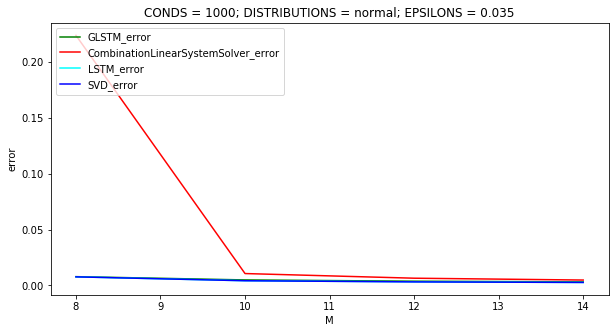

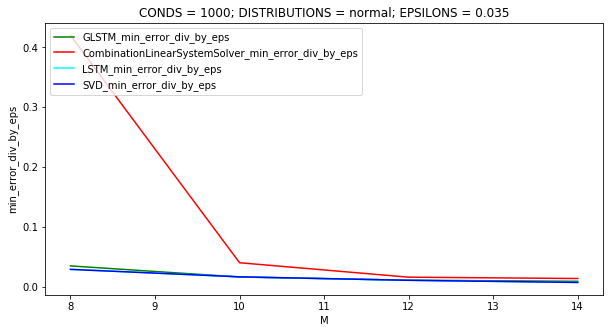

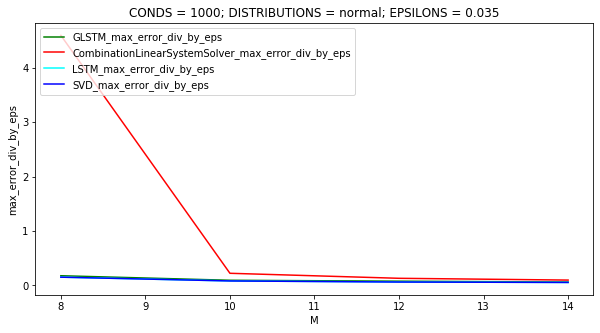

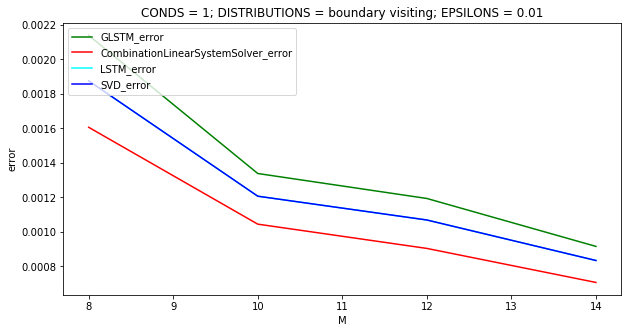

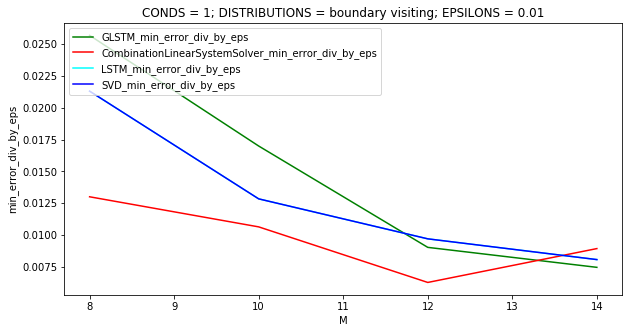

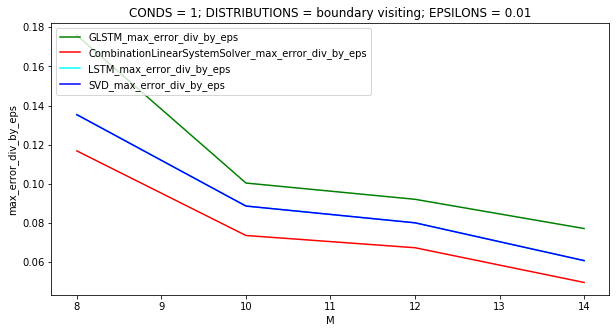

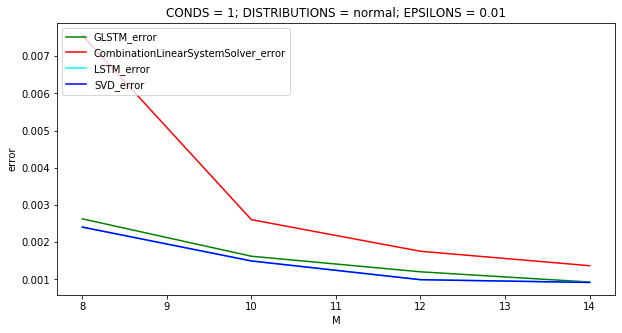

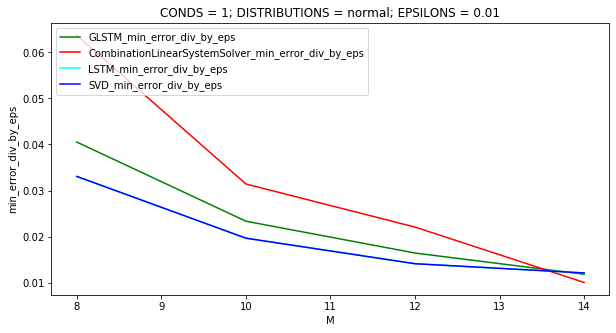

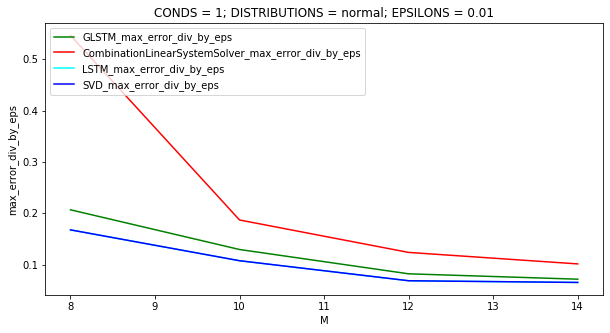







Plotting experiments with EPSILONS


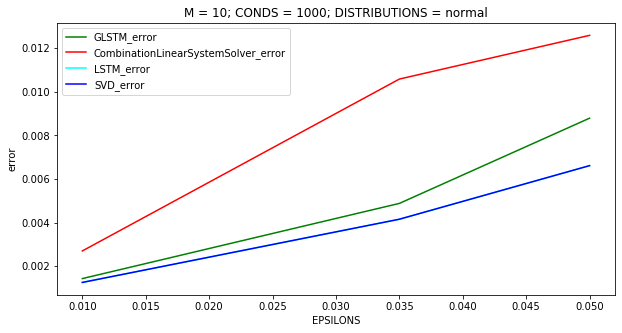

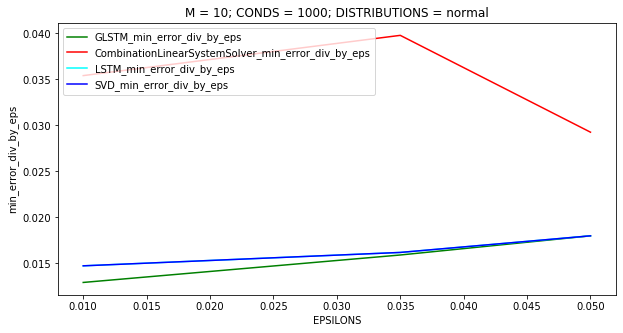

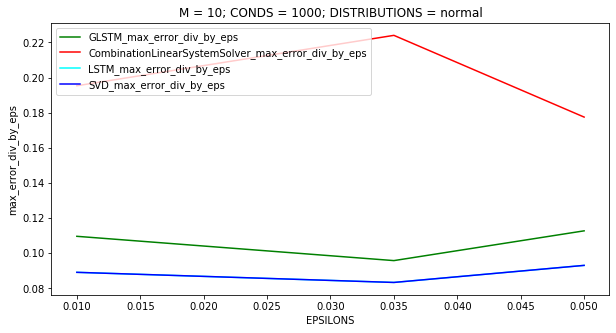

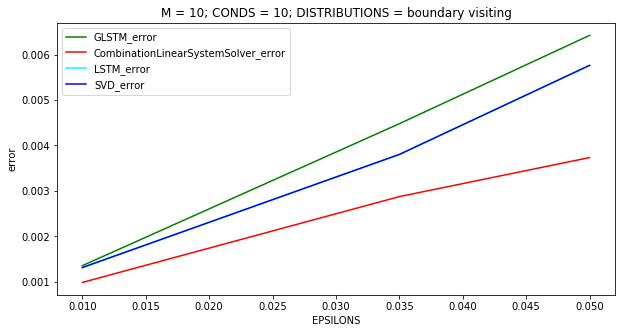

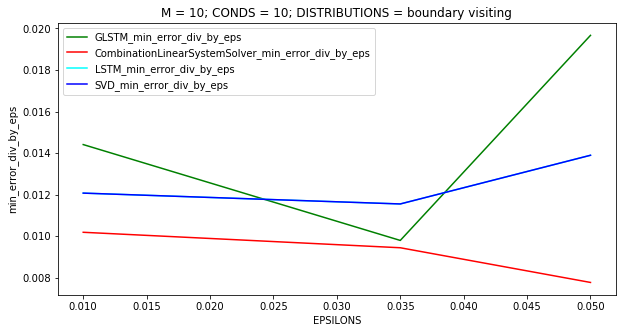

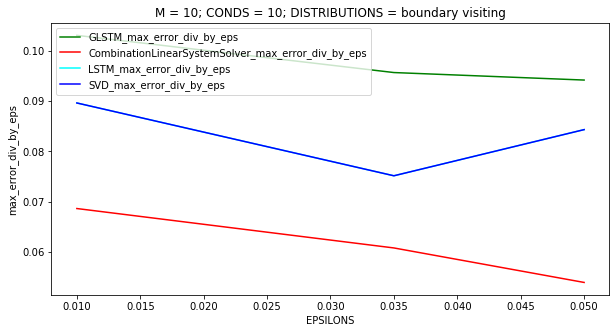

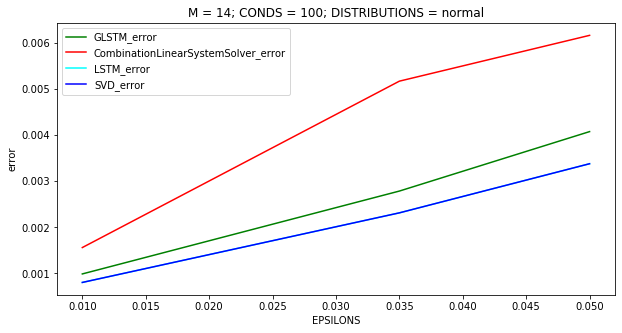

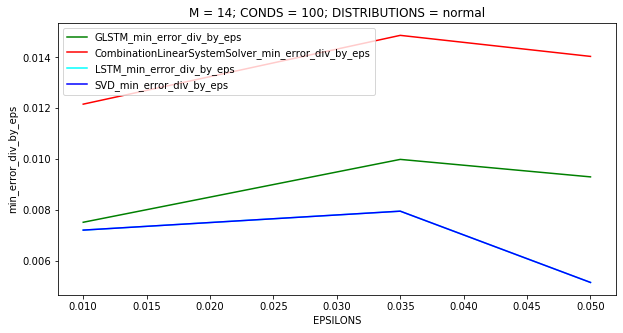

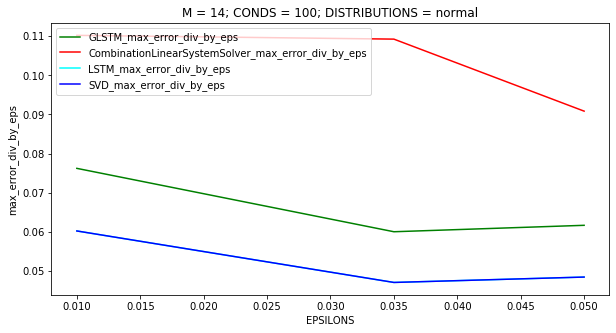







Plotting experiments with CONDS


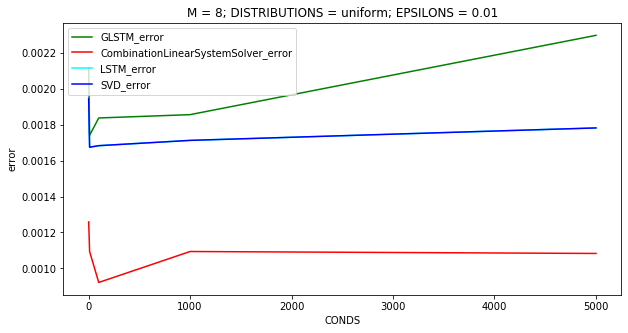

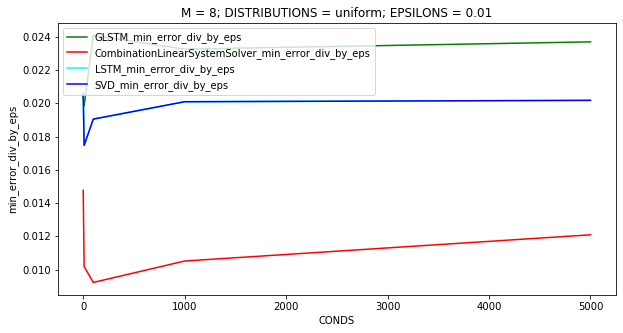

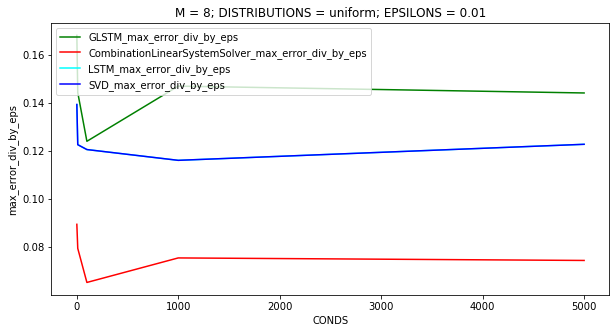

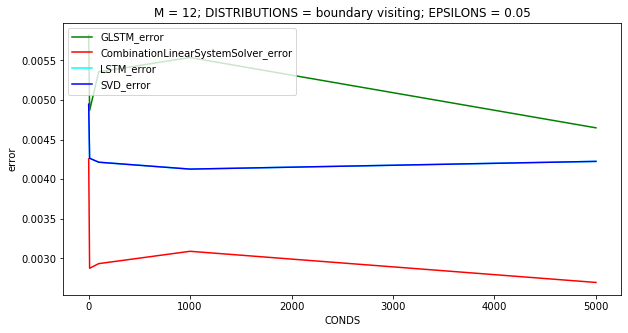

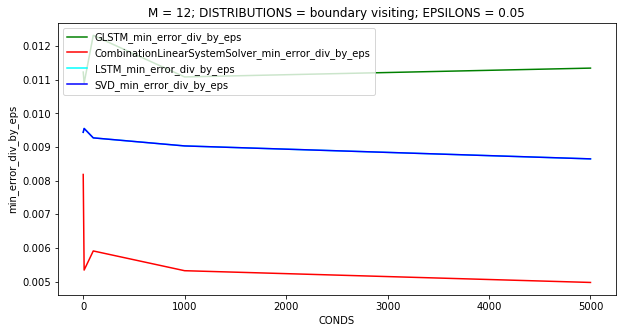

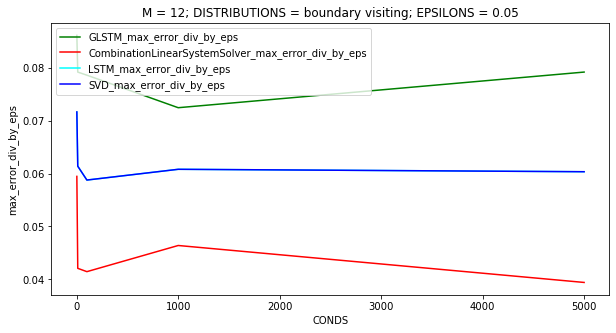

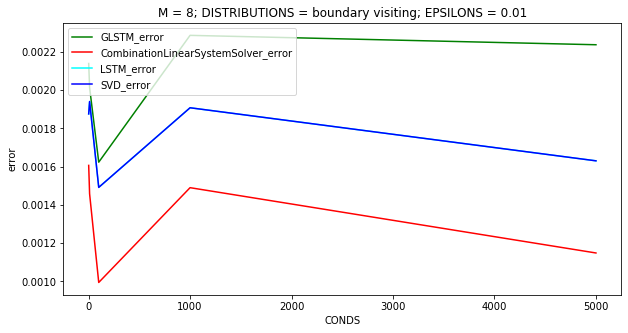

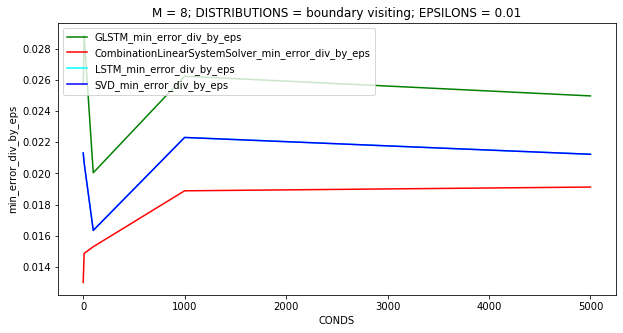

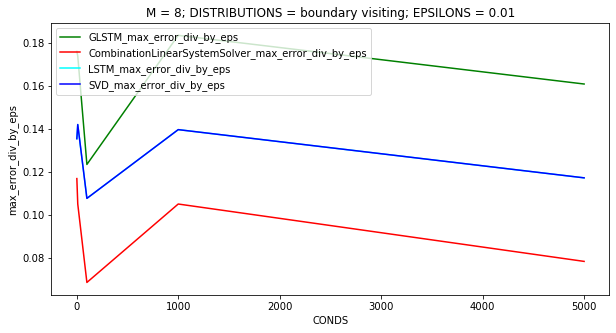







Plotting experiments with DISTRIBUTIONS


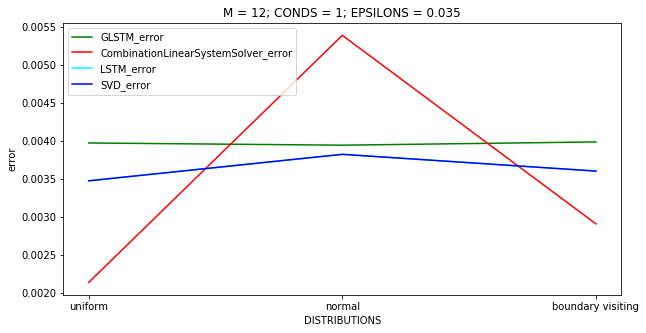

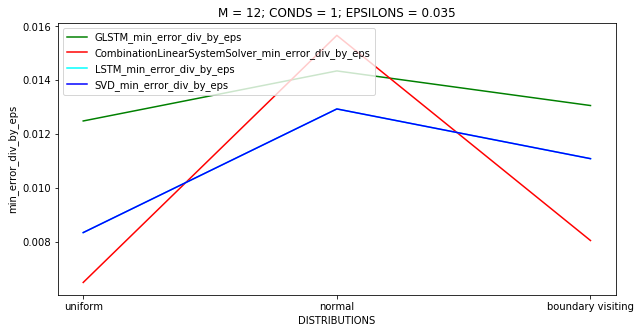

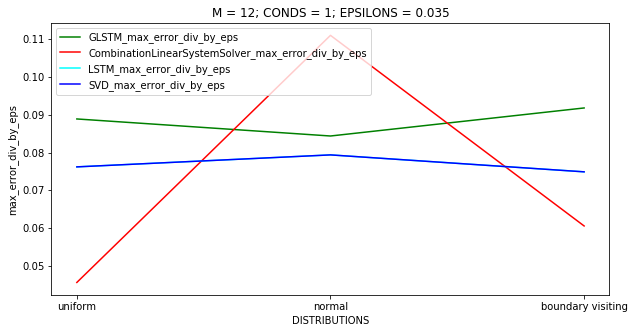

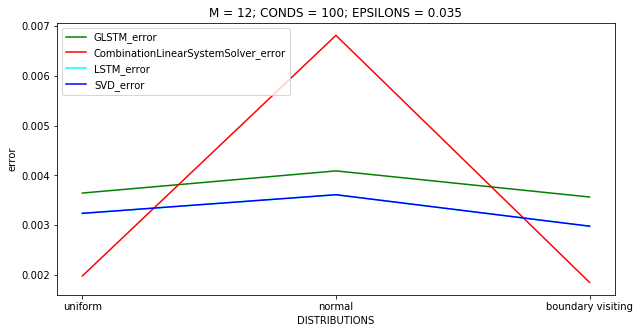

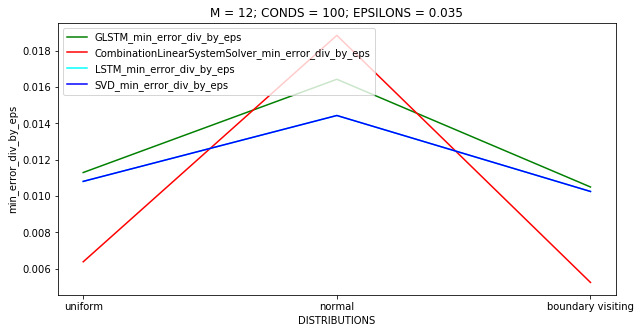

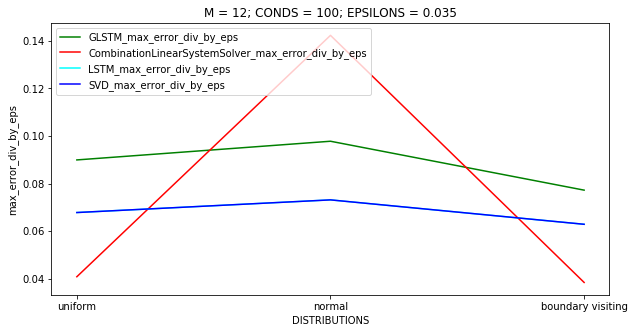

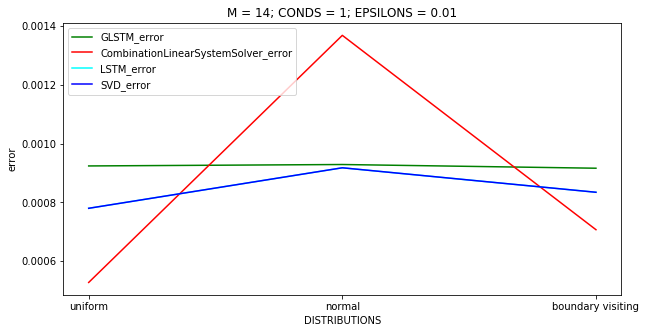

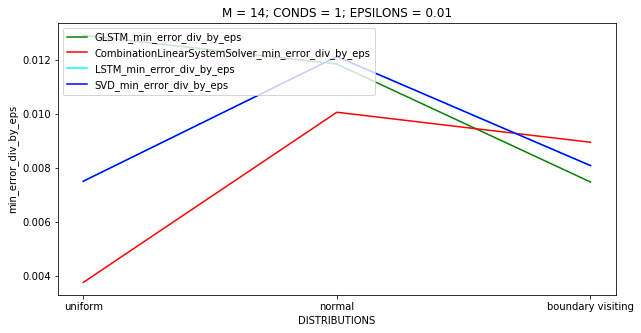

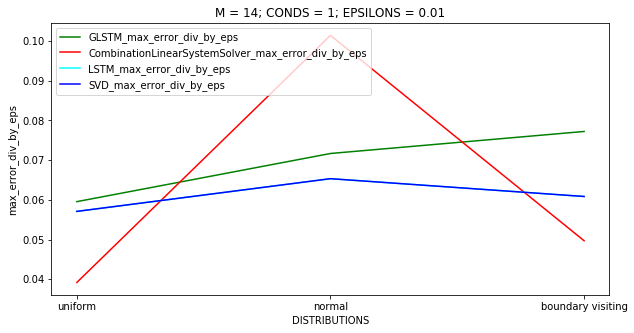

In [7]:
exp.visualise_experiment(colors=['green','red','cyan','blue'])